# Introduction to K-Nearest Neighbors (KNN) Algorithm

## Overview
This notebook introduces the K-Nearest Neighbors (KNN) algorithm, a simple yet powerful supervised machine learning method. KNN is intuitive, easy to implement, and serves as an excellent starting point for understanding classification and regression in machine learning.


## 1. Introduction to KNN <a id="intro"></a>

K-Nearest Neighbors (KNN) is a non-parametric, lazy learning algorithm used for both classification and regression:

- **Non-parametric**: It doesn't make assumptions about the underlying data distribution
- **Lazy**: It doesn't build a model during training; instead, it memorizes the training dataset

### How KNN Works:
1. Select a value for K (number of neighbors)
2. Calculate the distance from the new point to all training points
3. Find the K closest training points (neighbors)
4. For classification: assign the most common class among these neighbors
5. For regression: assign the average value among these neighbors

## 2. Required Libraries <a id="libraries"></a>

Let's import the necessary libraries for our KNN exploration:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# For prettier plots
plt.style.use('ggplot')
%matplotlib inline

## 3. Understanding KNN with a Synthetic Dataset <a id="synthetic"></a>

Let's create a simple 2D dataset to visualize how KNN works:

(200, 2) (200,)
[[ 1.76990905  0.89429464]
 [ 5.22077224  0.48415399]
 [ 4.68399715  2.86956661]
 [-4.42134431  9.8667525 ]
 [ 5.1456642   0.85231055]] 
 [1 1 1 0 1]


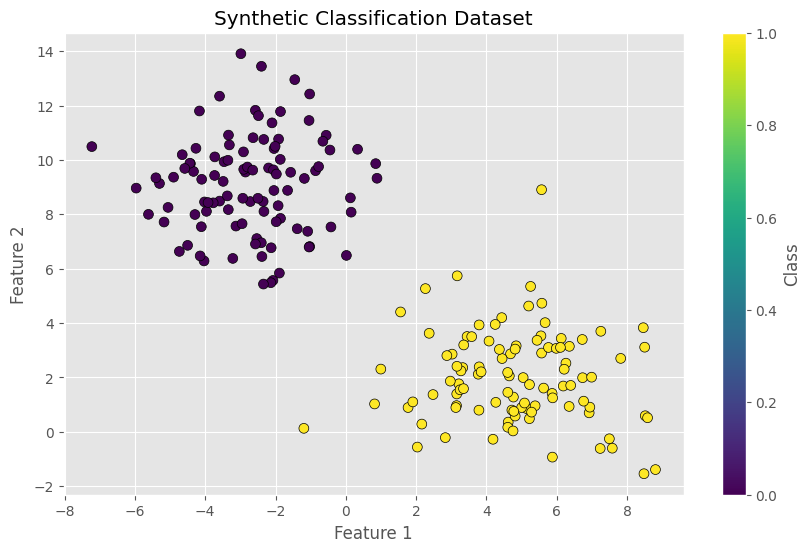

In [9]:
# Generate synthetic data
def create_synthetic_data(n_samples=200):
    """Create a synthetic dataset with two classes in 2D space"""
    X, y = datasets.make_blobs(n_samples=n_samples, centers=2, 
                              cluster_std=1.8, random_state=42)
    return X, y

X, y = create_synthetic_data()
# PERSONAL_NOTE
print (X.shape, y.shape)  # Check the shape of the dataset  
print (X[:5],"\n", y[:5])  # Print the first 5 samples
# PERSONAL_NOTE

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Synthetic Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 140 samples
Testing set size: 60 samples


## 4. Implementing KNN from Scratch <a id="scratch"></a>

To deeply understand how KNN works, let's implement it from scratch:

In [11]:
class SimpleKNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Store the training data"""
        self.X_train = X
        self.y_train = y
        return self
    
    def _euclidean_distance(self, x1, x2):
        """Calculate Euclidean distance between two points"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        """Predict the class of test samples"""
        y_pred = []
        
        for x in X:
            # Calculate distances to all training samples
            distances = []
            for i, x_train in enumerate(self.X_train):
                dist = self._euclidean_distance(x, x_train)
                distances.append((dist, self.y_train[i]))
            
            # Sort distances and get the k nearest samples
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]
            
            # Get the most common class among the k nearest neighbors
            k_nearest_labels = [label for _, label in k_nearest]
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(most_common)
        
        return np.array(y_pred)

# Test our custom KNN implementation
custom_knn = SimpleKNN(k=3)
custom_knn.fit(X_train, y_train)
custom_predictions = custom_knn.predict(X_test)

print(f"Custom KNN Accuracy: {accuracy_score(y_test, custom_predictions):.4f}")

Custom KNN Accuracy: 1.0000


## 5. Using Scikit-learn for KNN <a id="sklearn"></a>

Now let's use scikit-learn's implementation for comparison:

In [12]:
# Train and test scikit-learn's KNN classifier
sklearn_knn = neighbors.KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
sklearn_predictions = sklearn_knn.predict(X_test)

print(f"Scikit-learn KNN Accuracy: {accuracy_score(y_test, sklearn_predictions):.4f}")

# Compare predictions
comparison = pd.DataFrame({
    'True Labels': y_test,
    'Custom KNN Predictions': custom_predictions,
    'Scikit-learn Predictions': sklearn_predictions
})
print("\nPrediction Comparison:")
print(comparison.head(10))

# Calculate confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, sklearn_predictions))

print("\nClassification Report:")
print(classification_report(y_test, sklearn_predictions))

Scikit-learn KNN Accuracy: 1.0000

Prediction Comparison:
   True Labels  Custom KNN Predictions  Scikit-learn Predictions
0            0                       0                         0
1            0                       0                         0
2            0                       0                         0
3            0                       0                         0
4            0                       0                         0
5            1                       1                         1
6            0                       0                         0
7            1                       1                         1
8            0                       0                         0
9            1                       1                         1

Confusion Matrix:
[[37  0]
 [ 0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        23

 

## 6. Application: Iris Dataset Classification <a id="iris"></a>

Now let's apply KNN to a real-world dataset: the famous Iris dataset.

In [13]:
# Load the Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

print("Iris Dataset Information:")
print(f"Number of samples: {X_iris.shape[0]}")
print(f"Number of features: {X_iris.shape[1]}")
print(f"Features: {feature_names}")
print(f"Classes: {class_names}")
print(f"Class distribution: {np.bincount(y_iris)}")

Iris Dataset Information:
Number of samples: 150
Number of features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]


In [ ]:
# Split the dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_iris)
X_test_scaled = scaler.transform(X_test_iris)

# Find optimal K for Iris dataset
optimal_k_iris, _ = find_optimal_k(X_train_scaled, y_train_iris)

# Train final model with optimal K
final_knn = neighbors.KNeighborsClassifier(n_neighbors=optimal_k_iris)
final_knn.fit(X_train_scaled, y_train_iris)
y_pred_iris = final_knn.predict(X_test_scaled)

# Evaluate the model
print("\nIris Classification Results:")
print(f"Accuracy: {accuracy_score(y_test_iris, y_pred_iris):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_iris, y_pred_iris))
print("\nClassification Report:")
print(classification_report(y_test_iris, y_pred_iris, target_names=class_names))

NameError: name 'final_knn' is not defined

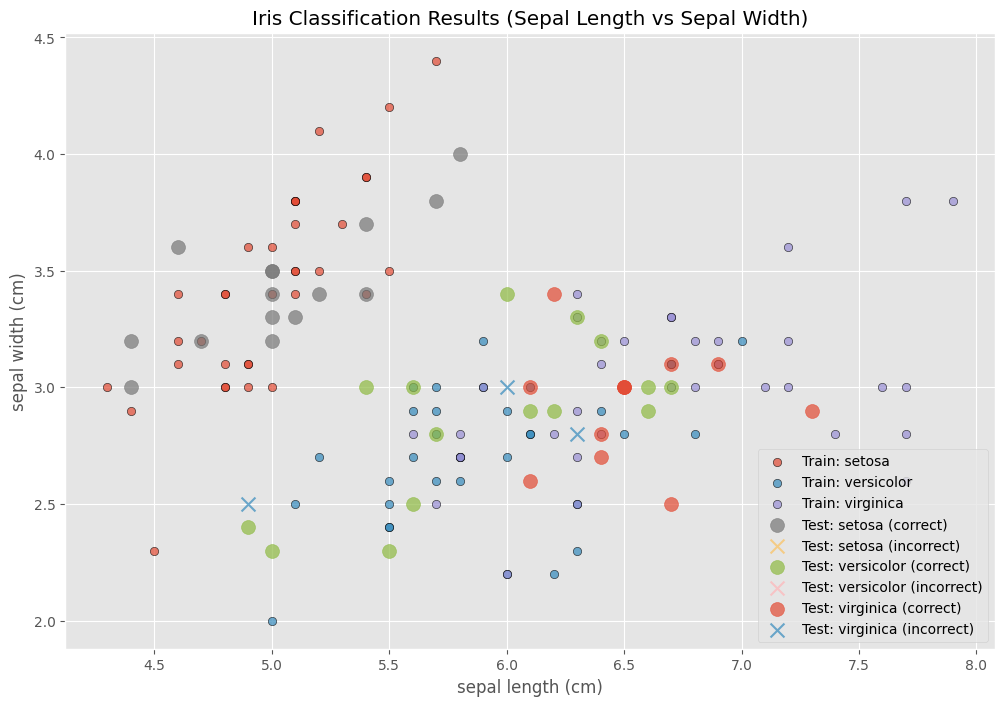

In [ ]:
# Visualize results with a scatter plot (sepal length vs sepal width)
plt.figure(figsize=(12, 8))

# Plot the training data
for i, class_name in enumerate(class_names):
    idx = y_train_iris == i
    plt.scatter(X_train_iris[idx, 0], X_train_iris[idx, 1], 
                label=f'Train: {class_name}', alpha=0.7, edgecolor='k')

# Plot the testing data with predictions
for i, class_name in enumerate(class_names):
    idx = (y_test_iris == i) & (y_pred_iris == i)  # Correct predictions
    plt.scatter(X_test_iris[idx, 0], X_test_iris[idx, 1], 
                marker='o', s=100, label=f'Test: {class_name} (correct)', alpha=0.7)
    
    idx = (y_test_iris == i) & (y_pred_iris != i)  # Incorrect predictions
    plt.scatter(X_test_iris[idx, 0], X_test_iris[idx, 1], 
                marker='x', s=100, label=f'Test: {class_name} (incorrect)', alpha=0.7)

plt.title('Iris Classification Results (Sepal Length vs Sepal Width)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

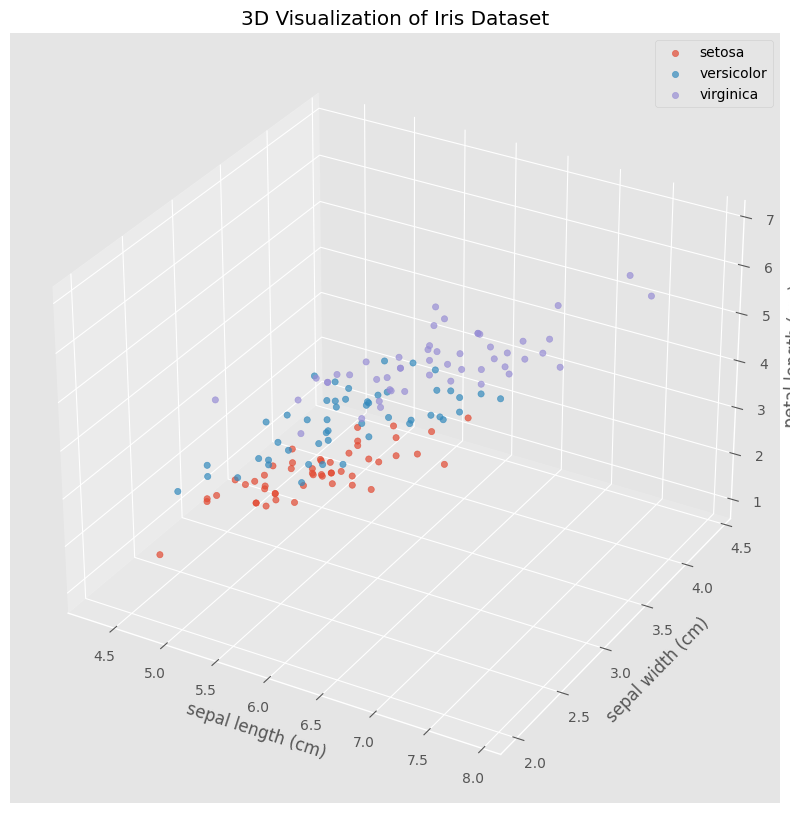

In [ ]:
# 3D visualization of Iris dataset
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each class with a different color
for i, class_name in enumerate(class_names):
    idx = y_iris == i
    ax.scatter(X_iris[idx, 0], X_iris[idx, 1], X_iris[idx, 2], 
               label=class_name, alpha=0.7)

ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
ax.set_title('3D Visualization of Iris Dataset')
ax.legend()
plt.show()